# Weekend Project -  Week 11 - Nov 20, 2020
# Saudi Digital Academy
--------------------------------------------------------------------------------------------

# Fake News Detector
### Building a system to identify unreliable news articles.


In [1]:
# 1- (Raw Text) <<<<<  Reading and Exploring your Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
# 2- (Tokenization) and (Text Cleaning) and (Vectorization)
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from string import punctuation
# 3- (ML Algorithm)
from sklearn.model_selection import train_test_split
# 4- (Transformer)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# 5- Pipline Classifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn import svm
# 6- (Evaluation)
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Data
# 1- Reading and Exploring your Data
---------------------------------------------------------------------------------------------

In [2]:
# Read the data
df = pd.read_csv('../input/fake-news/train.csv')

In [3]:
# Rows and columns in the data
df.shape

(20800, 5)

In [4]:
# Take a glimpse of the data
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
# Get more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
# Check for missing data in each feature/column
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
# Drop unrelated features first, then drop missing data
df = df.drop(columns=['title', 'author']).dropna()

In [8]:
# Double check missing data
df.isna().sum()

id       0
text     0
label    0
dtype: int64

In [9]:
# Get the labels. 1: unreliable, 0: reliable
labels = df.label
labels.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

# 2- (Tokenization) and (Text Cleaning) and (Vectorization)
--------------------------------------------------------------------------------------------------

In [10]:
'''
nltk.download('stopwords')
tokenizer=RegexpTokenizer('r\w+')
stopwords_english=set(stopwords.words('english'))

def CleanNews(news):
 news=news.replace("<br /><br />"," ")
 news=news.lower()
 news=news.split() 
 news= ''.join(p for p in news if p not in punctuation)
 # Tokenizing the text
 news_tokens=tokenizer.tokenize(news)
 news_tokens_without_stopwords=[token for token in news_tokens if token not in stopwords_english]
 stemmed_news_tokens_without_stopwords=[PorterStemmer().stem(token) for token in news_tokens_without_stopwords]
 cleaned_news=' '.join(stemmed_news_tokens_without_stopwords)
 return cleaned_news

# Clean the data 
df['text'] = df['text'].apply(CleanNews)
# print(df)
'''
# Removing Null
nulls = df.isnull().sum()
nulls[nulls > 0]
df    = df.fillna(0)
# print(df['text'])

In [11]:
# Defining X and y
X = df['text']
y = df['label']
print(X.shape) 
print(y.shape)

(20761,)
(20761,)


# 3- ML Algorithm
--------------------------------------------------------------------------------------------------

In [12]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7) #, shuffle=True)

# 4- (Transformer) TfidfTransformer (tf-idf) transformer
--------------------------------------------------------------------------------------------------

In [13]:
# Initialize a TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df=0.75)     # PAC Accuracy: 0.961015 0.874053
tfidf_vectorizer  = TfidfVectorizer(sublinear_tf=True, encoding='ISO-8859-1') # PAC Accuracy: 0.972768 0.875915


# Fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test  = tfidf_vectorizer.transform(X_test)

# 5- Pipeline
--------------------------------------------------------------------------------------------------

In [14]:
pipe = Pipeline(steps = [('clf', PassiveAggressiveClassifier())])
                         
                         
search_space = [{'clf': [PassiveAggressiveClassifier()]},
                {'clf': [MultinomialNB()]},
                {'clf': [BernoulliNB()]},
                {'clf': [RidgeClassifier()]},
                {'clf': [SGDClassifier()]},
                {'clf': [Perceptron()]},
                {'clf': [RandomForestClassifier()]}]
                         
gridsearch = GridSearchCV(estimator  = pipe,
                          param_grid = search_space,
                          scoring    = 'accuracy')
                         
best_model = gridsearch.fit(tfidf_train, y_train)

# 6- (Evaluation)
--------------------------------------------------------------------------------------------------

In [15]:
print('Best accuracy: %f using %s'%(best_model.best_score_, best_model.best_params_))

Best accuracy: 0.972319 using {'clf': SGDClassifier()}


In [16]:
cv_results = gridsearch.cv_results_['mean_test_score']
cv_results

array([0.97212588, 0.76737315, 0.75484907, 0.97103404, 0.97231856,
       0.9625562 , 0.90770713])

In [18]:
y_pred = best_model.predict(tfidf_test)

In [19]:
# Build confusion matrix. 1: unreliable, 0: reliable
confusion_matrix(y_test, y_pred, labels=[1, 0])

array([[2588,   76],
       [  63, 2464]])

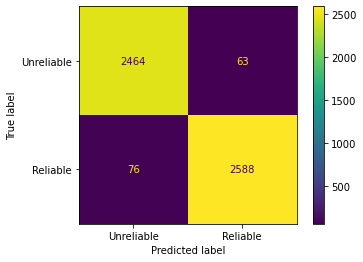

In [20]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(best_model, tfidf_test, y_test, display_labels=['Unreliable', 'Reliable'])

## Test Data

In [21]:
# Read the data
test_data = pd.read_csv('../input/fake-news/test.csv')

In [22]:
# Rows and columns in the data
test_data.shape

(5200, 4)

In [23]:
# Take a glimpse of the data
test_data.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [24]:
# Get some information about the data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [25]:
# How many missing data in each feature/column
test_data.isna().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [26]:
# Assign ids to an object to use it later for Kaggle submission
test_id = test_data['id']

# 2- (Tokenization) and (Text Cleaning) and (Vectorization)
test_data         = test_data.drop(columns=['id','title', 'author']).fillna('fake and unreliable')
test_data         = test_data.fillna(0)
test_data['text'] = test_data['text']

# 3- (Transformer) TfidfTransformer (tf-idf) transformer
test_vectorized = tfidf_vectorizer.transform(test_data['text'])

# 4- Predict test data
test_predictions = best_model.predict(test_vectorized)

In [27]:
# Join test data's ids with their respective predicted labels
submission = pd.DataFrame({'id':test_id, 'label':test_predictions})
print(submission.shape)
print(submission.head())

(5200, 2)
      id  label
0  20800      0
1  20801      1
2  20802      1
3  20803      0
4  20804      1


In [28]:
# Save the submission file
submission.to_csv('submission.csv', index=False)